NameError: name 'param_sets_df' is not defined

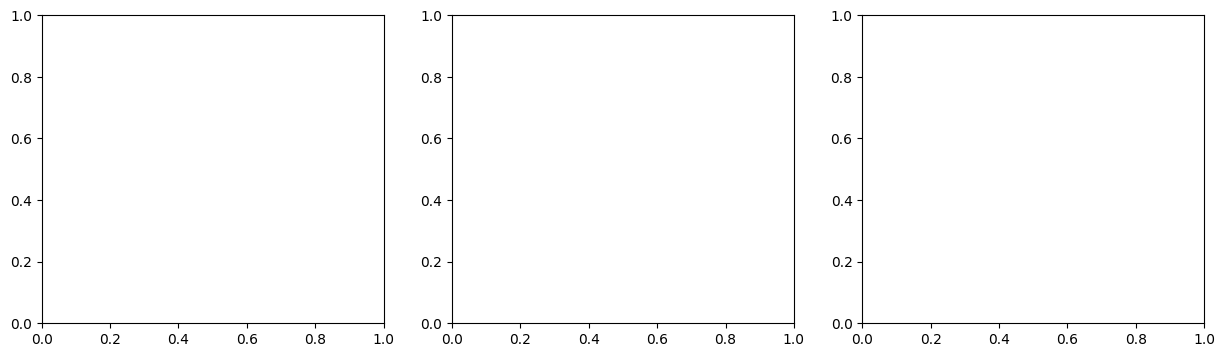

In [1]:
# Test plot differences
import matplotlib.pyplot as plt

indices_to_test = [60, 50, 96]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, idx in enumerate(indices_to_test):
    fitted_dict = param_sets_df.iloc[idx].to_dict()
    fitted_dict_subset = {}
    for param_name in estimator.estimable_params:
        if param_name in fitted_dict:
            fitted_dict_subset[param_name] = fitted_dict[param_name]
        else:
            fitted_dict_subset[param_name] = estimator.param_info[param_name]['nominal']
    
    param_vector = estimator.params_to_vector(fitted_dict_subset)
    
    # Get results
    results = estimator.simulate_conditions(param_vector)
    cond_id = conditions_subset.iloc[0]['conditionId']
    
    # Plot
    ax = axes[i]
    ax.plot(results[cond_id]['time'], results[cond_id]['total_pS1'], label='pS1')
    ax.set_title(f'Set {idx}')
    ax.set_xlabel('Time')
    ax.set_ylabel('total_pS1')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()